### Great Lakes Solution

In [13]:
huron = [3500]
erie = [1800]
ontario = [2400]
years = [0]
for i in range(100):
    huron.append(25-0.11*huron[-1]+huron[-1])
    erie.append(0.11*huron[-2]-0.36*erie[-1]+erie[-1])
    ontario.append(0.36*erie[-2]-0.12*ontario[-1]+ontario[-1])
    years.append(years[-1]+1)
    
for i in range(10):
    print(years[0],huron[i], erie[i], ontario[i])

0 3500 1800 2400
0 3140.0 1537.0 2760.0
0 2819.6 1329.08 2982.12
0 2534.444 1160.7672 3102.7344
0 2280.65516 1021.679848 3148.282464
0 2054.7830924 904.74717032 3138.2933135999997
0 1853.756952236 805.0643291688 3087.4070972831996
0 1674.8436874900399 719.154435413992 3006.7414041099837
0 1515.6108818661355 644.4916442888593 2904.8280323658228
0 1373.8936848608605 579.1918493501448 2788.265660425913


To plot them versus time:

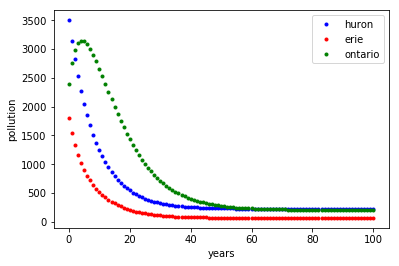

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(years, huron, 'b.', label = 'huron')
plt.plot(years, erie, 'r.', label = 'erie')
plt.plot(years, ontario, 'g.', label = 'ontario')
plt.xlabel('years')
plt.ylabel('pollution')
plt.legend(loc='upper right')

### SIRS solution

In [34]:
sus = [0.9]
inf = [0.1]
rem = [0.0]
days = [0]
for i in range(100):
    sus.append(sus[-1]+
               1*(-0.6*sus[-1]*inf[-1]+0.1*(1-sus[-1]-inf[-1])))
    inf.append(inf[-1]+1*(0.6*sus[-2]*inf[-1]-0.34*inf[-1]))
    rem.append(1-sus[-1]-inf[-1])
    days.append(days[-1]+1)
for i in range(10):
    print(days[0],sus[i], inf[i], rem[i])

0 0.9 0.1 0.0
0 0.846 0.12000000000000001 0.034000000000000016
0 0.788488 0.14011200000000001 0.07140000000000002
0 0.7293420216063999 0.15875989839360002 0.11189808000000004
0 0.671057670459751 0.17425569208642494 0.1546866374538241
0 0.6163649629276126 0.18517012805456123 0.1984649090178262
0 0.5677320263612047 0.19069171198420093 0.2415762616545944
0 0.5269325772936175 0.1908136051426192 0.2822538175637633
0 0.4948304162057017 0.18626452223842085 0.3189050615558775
0 0.47141931172313306 0.17823619531551413 0.3503444929613527


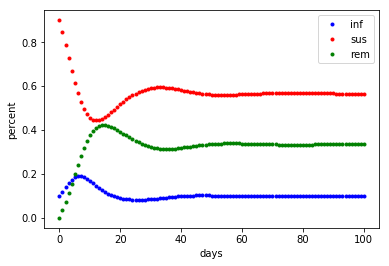

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(days, inf, 'b.', label = 'inf')
plt.plot(days, sus, 'r.', label = 'sus')
plt.plot(days, rem, 'g.', label = 'rem')
plt.xlabel('days')
plt.ylabel('percent')
plt.legend(loc='upper right')

### China
For the China example, our Leslie Matrix and our initial population vector are:

In [3]:
from scipy import linalg
import numpy as np

L = np.matrix([[0,.28,.22,0,0,0,0,0,0], 
               [.97,0,0,0,0,0,0,0,0],
              [0,.993,0,0,0,0,0,0,0],
              [0,0,.987,0,0,0,0,0,0],
              [0,0,0,.981,0,0,0,0,0],
              [0,0,0,0,.962,0,0,0,0],
              [0,0,0,0,0,.907,0,0,0],
              [0,0,0,0,0,0,.761,0,0],
              [0,0,0,0,0,0,0,.51,0]])
P = np.matrix([[102],[129],[85],[64],[49],[37],[24],[11],[3]])

So one iteration (10 years later) in 1992, the population distributions are:

10 iterations (100 years) later in 2082:

In [4]:
print(L**10*P)

[[ 4.81500301]
 [ 6.13852238]
 [ 8.36822686]
 [11.01573714]
 [14.00134608]
 [19.51974338]
 [21.80430628]
 [22.60524373]
 [17.64964666]]


The growth rate is the largest eigenvalue. Thus, a largest eigenvaule of 0.75 corresponds to the fact that the population is decreasing at a rate of 25% every 10 years in the long run.

In [5]:
eigenvalues, eigenvectors = linalg.eig(L)
print(eigenvalues)

[ 0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
 -0.37277052+0.38114771j -0.37277052-0.38114771j  0.74554104+0.j        ]
